<a href="https://colab.research.google.com/github/Abhiraj36/Compression01/blob/main/Linear_regression_for_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

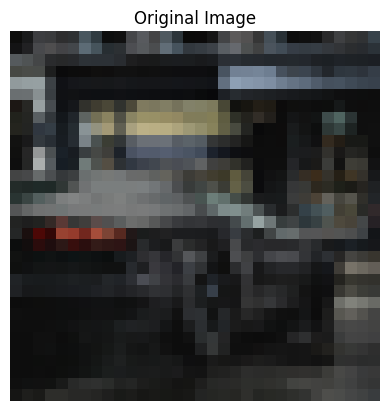

PSNR: 17.61 dB
SSIM: 0.1390

File Sizes (KB):
Original JPEG: 1.83
Reconstructed JPEG: 0.78
Model Weights (Compressed): 0.23


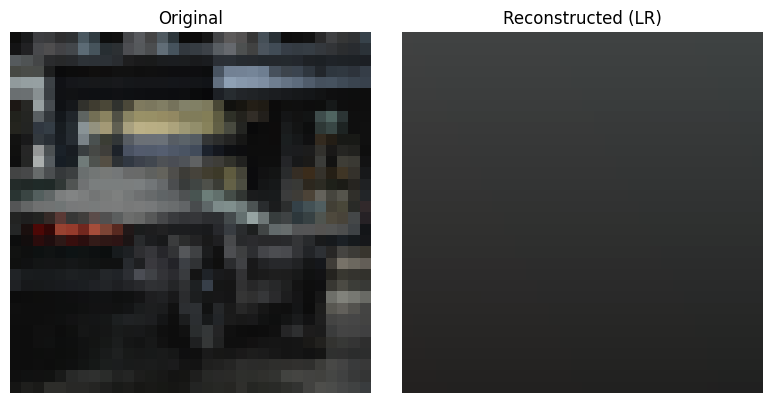

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import os
import pickle


img = Image.open("image.jpg").convert("RGB").resize((32, 32))
img_np = np.array(img) / 255.0


plt.imshow(img_np)
plt.title("Original Image")
plt.axis('off')
plt.show()


h, w, _ = img_np.shape
coords = np.array([[x, y] for x in range(h) for y in range(w)])
coords = coords / np.array([[h-1, w-1]])


r_vals = img_np[:, :, 0].flatten()
g_vals = img_np[:, :, 1].flatten()
b_vals = img_np[:, :, 2].flatten()


r_model = LinearRegression().fit(coords, r_vals)
g_model = LinearRegression().fit(coords, g_vals)
b_model = LinearRegression().fit(coords, b_vals)


r_img = np.clip(r_model.predict(coords), 0, 1).reshape(h, w)
g_img = np.clip(g_model.predict(coords), 0, 1).reshape(h, w)
b_img = np.clip(b_model.predict(coords), 0, 1).reshape(h, w)

reconstructed = np.stack([r_img, g_img, b_img], axis=2)


recon_img = Image.fromarray((reconstructed * 255).astype(np.uint8))
recon_img.save("reconstructed_lr.jpg", "JPEG", quality=100)


img.save("original.jpg", "JPEG", quality=100)


psnr_score = psnr(img_np, reconstructed, data_range=1.0)
ssim_score = ssim(img_np, reconstructed, channel_axis=2, data_range=1.0)


with open("linear_model_weights.pkl", "wb") as f:
    pickle.dump({
        'r': r_model.coef_.tolist() + [r_model.intercept_],
        'g': g_model.coef_.tolist() + [g_model.intercept_],
        'b': b_model.coef_.tolist() + [b_model.intercept_]
    }, f)


size_original = os.path.getsize("original.jpg") / 1024
size_recon = os.path.getsize("reconstructed_lr.jpg") / 1024
size_model = os.path.getsize("linear_model_weights.pkl") / 1024


print(f"PSNR: {psnr_score:.2f} dB")
print(f"SSIM: {ssim_score:.4f}")
print("\nFile Sizes (KB):")
print(f"Original JPEG: {size_original:.2f}")
print(f"Reconstructed JPEG: {size_recon:.2f}")
print(f"Model Weights (Compressed): {size_model:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_np)
axes[0].set_title("Original")
axes[0].axis("off")
axes[1].imshow(reconstructed)
axes[1].set_title("Reconstructed (LR)")
axes[1].axis("off")
plt.tight_layout()
plt.show()


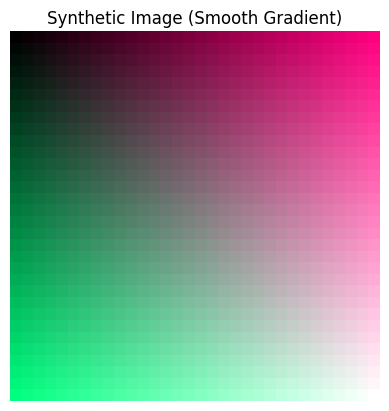

PSNR: 313.42 dB
SSIM: 1.0000


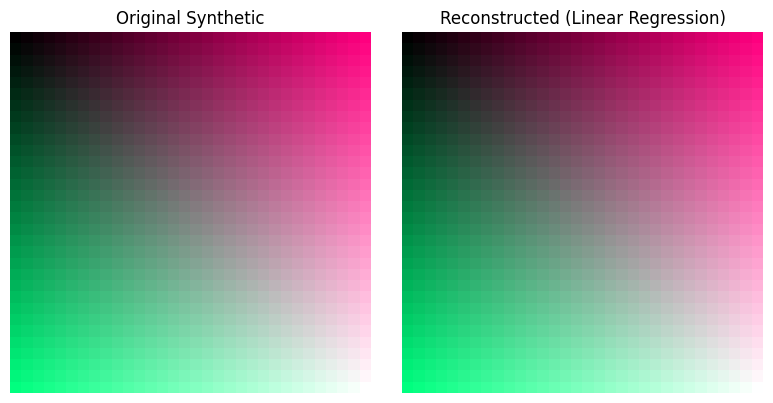

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image


h, w = 32, 32
x = np.linspace(0, 1, w)
y = np.linspace(0, 1, h)
xv, yv = np.meshgrid(x, y)


r = xv
g = yv
b = 0.5 * xv + 0.5 * yv
synthetic_img = np.stack([r, g, b], axis=2)

plt.imshow(synthetic_img)
plt.title("Synthetic Image (Smooth Gradient)")
plt.axis('off')
plt.show()


coords = np.array([[i, j] for i in range(h) for j in range(w)])
coords = coords / np.array([[h-1, w-1]])

r_vals = r.flatten()
g_vals = g.flatten()
b_vals = b.flatten()


r_model = LinearRegression().fit(coords, r_vals)
g_model = LinearRegression().fit(coords, g_vals)
b_model = LinearRegression().fit(coords, b_vals)


r_pred = r_model.predict(coords).reshape(h, w)
g_pred = g_model.predict(coords).reshape(h, w)
b_pred = b_model.predict(coords).reshape(h, w)

reconstructed = np.stack([
    np.clip(r_pred, 0, 1),
    np.clip(g_pred, 0, 1),
    np.clip(b_pred, 0, 1)
], axis=2)


psnr_val = psnr(synthetic_img, reconstructed, data_range=1.0)
ssim_val = ssim(synthetic_img, reconstructed, channel_axis=2, data_range=1.0)


print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(synthetic_img)
axes[0].set_title("Original Synthetic")
axes[0].axis("off")
axes[1].imshow(reconstructed)
axes[1].set_title("Reconstructed (Linear Regression)")
axes[1].axis("off")
plt.tight_layout()
plt.show()


Polynomial Regression (degree=2) PSNR: 312.07 dB
Polynomial Regression (degree=2) SSIM: 1.0000


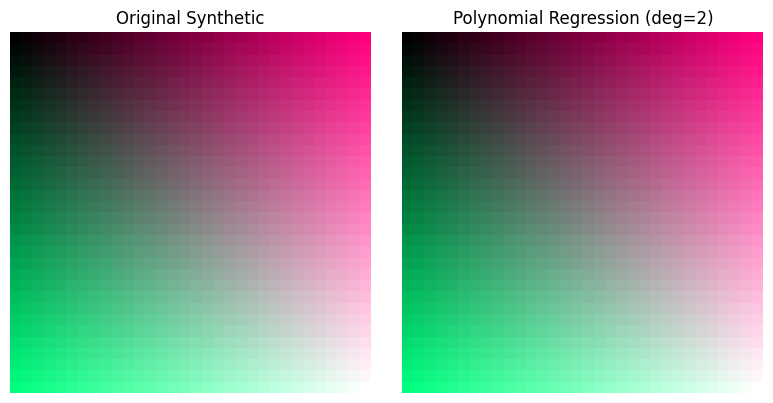

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Use your synthetic image data (h, w, coords, r_vals, g_vals, b_vals) from before

degree = 2  # try quadratic model

# Create polynomial features from coordinates
poly = PolynomialFeatures(degree)

coords_poly = poly.fit_transform(coords)

# Train polynomial regression models for each channel
r_model = LinearRegression().fit(coords_poly, r_vals)
g_model = LinearRegression().fit(coords_poly, g_vals)
b_model = LinearRegression().fit(coords_poly, b_vals)


r_pred = r_model.predict(coords_poly).reshape(h, w)
g_pred = g_model.predict(coords_poly).reshape(h, w)
b_pred = b_model.predict(coords_poly).reshape(h, w)

reconstructed = np.stack([
    np.clip(r_pred, 0, 1),
    np.clip(g_pred, 0, 1),
    np.clip(b_pred, 0, 1)
], axis=2)


psnr_val = psnr(synthetic_img, reconstructed, data_range=1.0)
ssim_val = ssim(synthetic_img, reconstructed, channel_axis=2, data_range=1.0)

print(f"Polynomial Regression (degree={degree}) PSNR: {psnr_val:.2f} dB")
print(f"Polynomial Regression (degree={degree}) SSIM: {ssim_val:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(synthetic_img)
axes[0].set_title("Original Synthetic")
axes[0].axis("off")
axes[1].imshow(reconstructed)
axes[1].set_title(f"Polynomial Regression (deg={degree})")
axes[1].axis("off")
plt.tight_layout()
plt.show()


Epoch 200/1000, Loss: 0.015710
Epoch 400/1000, Loss: 0.014032
Epoch 600/1000, Loss: 0.013028
Epoch 800/1000, Loss: 0.012376
Epoch 1000/1000, Loss: 0.011712

--- Metrics ---
Polynomial Regression: PSNR = 17.26, SSIM = 0.1703
MLP Reconstruction:     PSNR = 19.36, SSIM = 0.3578


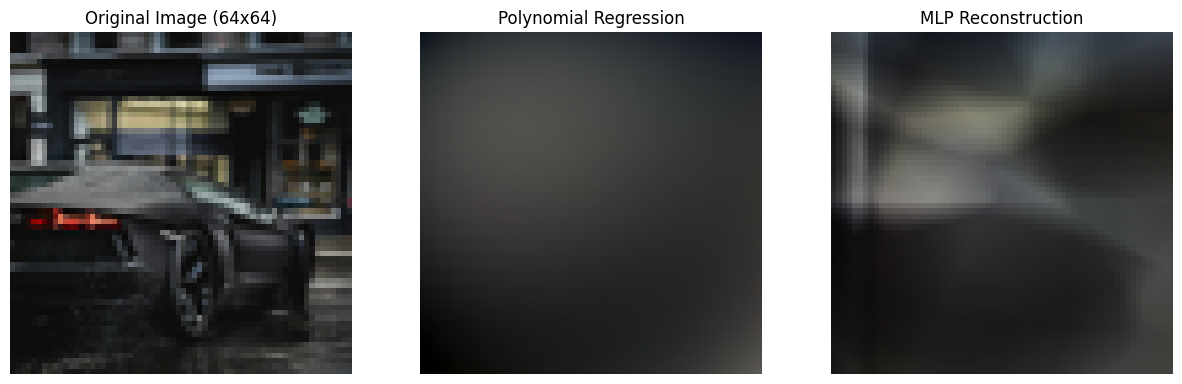

In [ ]:

!pip install scikit-image torch torchvision

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import torch
import torch.nn as nn
import torch.optim as optim


img = Image.open("image.jpg").convert("RGB").resize((64, 64))
img_np = np.array(img) / 255.0
h, w, _ = img_np.shape


coords = np.array([[i, j] for i in range(h) for j in range(w)]) / np.array([[h-1, w-1]])


r_vals = img_np[:, :, 0].flatten()
g_vals = img_np[:, :, 1].flatten()
b_vals = img_np[:, :, 2].flatten()

poly = PolynomialFeatures(degree=3)
coords_poly = poly.fit_transform(coords)

r_model_poly = LinearRegression().fit(coords_poly, r_vals)
g_model_poly = LinearRegression().fit(coords_poly, g_vals)
b_model_poly = LinearRegression().fit(coords_poly, b_vals)

r_pred_poly = r_model_poly.predict(coords_poly).reshape(h, w)
g_pred_poly = g_model_poly.predict(coords_poly).reshape(h, w)
b_pred_poly = b_model_poly.predict(coords_poly).reshape(h, w)

recon_poly = np.stack([
    np.clip(r_pred_poly, 0, 1),
    np.clip(g_pred_poly, 0, 1),
    np.clip(b_pred_poly, 0, 1)
], axis=2)


class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 3),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

coords_t = torch.tensor(coords, dtype=torch.float32)
rgb_t = torch.tensor(img_np.reshape(-1, 3), dtype=torch.float32)
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(coords_t)
    loss = criterion(outputs, rgb_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

with torch.no_grad():
    pred_mlp = model(coords_t).numpy().reshape(h, w, 3)

psnr_poly = psnr(img_np, recon_poly, data_range=1.0)
ssim_poly = ssim(img_np, recon_poly, channel_axis=2, data_range=1.0)

psnr_mlp = psnr(img_np, pred_mlp, data_range=1.0)
ssim_mlp = ssim(img_np, pred_mlp, channel_axis=2, data_range=1.0)

print("\n--- Metrics ---")
print(f"Polynomial Regression: PSNR = {psnr_poly:.2f}, SSIM = {ssim_poly:.4f}")
print(f"MLP Reconstruction:     PSNR = {psnr_mlp:.2f}, SSIM = {ssim_mlp:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(img_np)
axes[0].set_title("Original Image (64x64)")
axes[0].axis("off")

axes[1].imshow(recon_poly)
axes[1].set_title("Polynomial Regression")
axes[1].axis("off")

axes[2].imshow(pred_mlp)
axes[2].set_title("MLP Reconstruction")
axes[2].axis("off")

plt.show()


Training...
Epoch 100/1000, Loss: 0.002568
Epoch 200/1000, Loss: 0.000225
Epoch 300/1000, Loss: 0.000016
Epoch 400/1000, Loss: 0.000007
Epoch 500/1000, Loss: 0.000004
Epoch 600/1000, Loss: 0.000002
Epoch 700/1000, Loss: 0.000002
Epoch 800/1000, Loss: 0.000001
Epoch 900/1000, Loss: 0.000003
Epoch 1000/1000, Loss: 0.000001


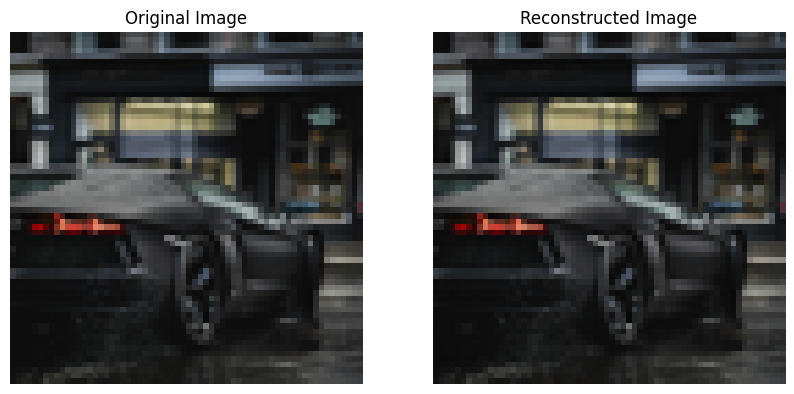

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("image.jpg").convert("RGB").resize((64, 64))
img_np = np.array(img) / 255.0
h, w, _ = img_np.shape

coords = np.stack(np.meshgrid(np.linspace(-1, 1, w), np.linspace(-1, 1, h)), axis=-1)
coords = coords.reshape(-1, 2)

colors = img_np.reshape(-1, 3)

coords_t = torch.tensor(coords, dtype=torch.float32)
colors_t = torch.tensor(colors, dtype=torch.float32)

class FourierFeatures(nn.Module):
    def __init__(self, input_dim=2, mapping_size=256, scale=10):
        super().__init__()
        self.B = torch.randn((input_dim, mapping_size)) * scale

    def forward(self, x):
        x_proj = 2 * np.pi * x @ self.B.to(x.device)
        return torch.cat([torch.sin(x_proj), torch.cos(x_proj)], dim=-1)

class MLP(nn.Module):
    def __init__(self, in_features, hidden_features=256, out_features=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, out_features),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)
fourier = FourierFeatures()
mlp = MLP(in_features=512)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fourier.to(device)
mlp.to(device)
coords_t = coords_t.to(device)
colors_t = colors_t.to(device)

optimizer = optim.Adam(list(fourier.parameters()) + list(mlp.parameters()), lr=1e-3)
loss_fn = nn.MSELoss()

print("Training...")

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    features = fourier(coords_t)
    pred = mlp(features)
    loss = loss_fn(pred, colors_t)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")
with torch.no_grad():
    features = fourier(coords_t)
    pred = mlp(features).cpu().numpy()

recon_img = pred.reshape(h, w, 3)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstructed Image")
plt.imshow(recon_img)
plt.axis("off")
plt.show()


Epoch 0, Loss: 0.128319
Epoch 200, Loss: 0.015070
Epoch 400, Loss: 0.011855
Epoch 600, Loss: 0.009666
Epoch 800, Loss: 0.007719
Epoch 1000, Loss: 0.006477
Epoch 1200, Loss: 0.005728
Epoch 1400, Loss: 0.005255
Epoch 1600, Loss: 0.004840
Epoch 1800, Loss: 0.004628
PSNR: 23.56 dB
SSIM: 0.7093


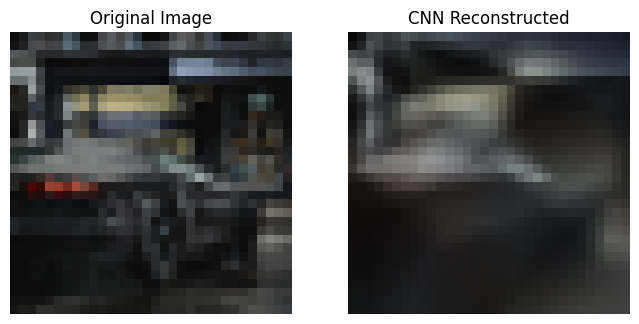

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

img = Image.open("image.jpg").convert("RGB").resize((32, 32))
img_np = np.array(img) / 255.0

h, w, _ = img_np.shape

coords = np.array([[x/w, y/h] for y in range(h) for x in range(w)], dtype=np.float32)
coords = torch.tensor(coords)

pixels = torch.tensor(img_np.reshape(-1, 3), dtype=torch.float32)

class CoordConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = CoordConvNet()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(coords)
    loss = criterion(output, pixels)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
with torch.no_grad():
    reconstructed = model(coords).numpy().reshape(h, w, 3)
psnr_val = psnr(img_np, reconstructed, data_range=1.0)
ssim_val = ssim(img_np, reconstructed, channel_axis=2, data_range=1.0)
print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_np)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(np.clip(reconstructed, 0, 1))
axes[1].set_title("CNN Reconstructed")
axes[1].axis("off")
plt.show()


Training R channel...
Training G channel...
Training B channel...
PSNR: 32.88 dB
SSIM: 0.9667


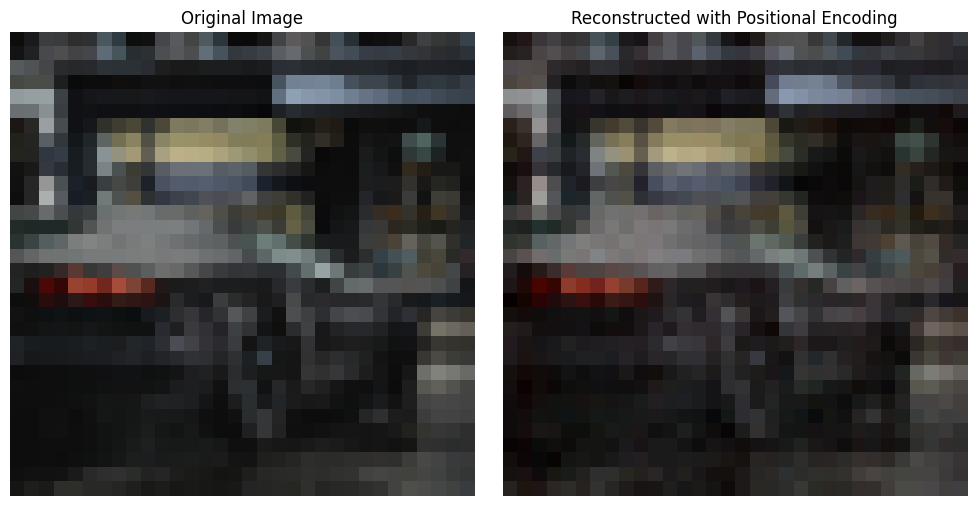

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image

def positional_encoding(coords, num_frequencies=10):
    """
    coords: numpy array of shape (N, 2) with values in [0, 1]
    Returns: numpy array with positional encoding features concatenated
    """
    coords = np.expand_dims(coords, axis=2)
    frequencies = (2 ** np.arange(num_frequencies)) * np.pi
    sin_features = np.sin(coords * frequencies)
    cos_features = np.cos(coords * frequencies)
    pe = np.concatenate([sin_features, cos_features], axis=2)
    pe = pe.reshape(coords.shape[0], -1)
    return np.concatenate([coords.squeeze(2), pe], axis=1)

img = Image.open("image.jpg").convert("RGB").resize((32, 32))
img_np = np.array(img) / 255.0

h, w, _ = img_np.shape

coords = np.array([[i, j] for i in range(h) for j in range(w)]) / (h - 1)

coords_pe = positional_encoding(coords, num_frequencies=10)

r_vals = img_np[:, :, 0].flatten()
g_vals = img_np[:, :, 1].flatten()
b_vals = img_np[:, :, 2].flatten()
r_model = MLPRegressor(hidden_layer_sizes=(256, 256), activation='relu', max_iter=2000, random_state=42)
g_model = MLPRegressor(hidden_layer_sizes=(256, 256), activation='relu', max_iter=2000, random_state=42)
b_model = MLPRegressor(hidden_layer_sizes=(256, 256), activation='relu', max_iter=2000, random_state=42)

print("Training R channel...")
r_model.fit(coords_pe, r_vals)
print("Training G channel...")
g_model.fit(coords_pe, g_vals)
print("Training B channel...")
b_model.fit(coords_pe, b_vals)
r_pred = r_model.predict(coords_pe).reshape(h, w)
g_pred = g_model.predict(coords_pe).reshape(h, w)
b_pred = b_model.predict(coords_pe).reshape(h, w)
reconstructed = np.stack([
    np.clip(r_pred, 0, 1),
    np.clip(g_pred, 0, 1),
    np.clip(b_pred, 0, 1)
], axis=2)
psnr_val = psnr(img_np, reconstructed, data_range=1.0)
ssim_val = ssim(img_np, reconstructed, channel_axis=2, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_np)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(reconstructed)
axes[1].set_title("Reconstructed with Positional Encoding")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Training started...
Epoch [50/500], Loss: 0.031027
Epoch [100/500], Loss: 0.011401
Epoch [150/500], Loss: 0.006566
Epoch [200/500], Loss: 0.004207
Epoch [250/500], Loss: 0.002930
Epoch [300/500], Loss: 0.002294
Epoch [350/500], Loss: 0.001866
Epoch [400/500], Loss: 0.001578
Epoch [450/500], Loss: 0.001382
Epoch [500/500], Loss: 0.001231
Training finished.


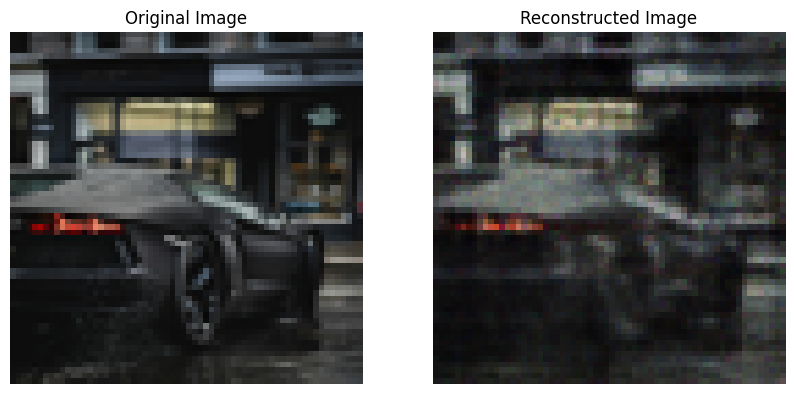

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img_path = "image.jpg"

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
img_tensor = img_tensor.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 500

print("Training started...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(img_tensor)
    loss = criterion(output, img_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

print("Training finished.")
model.eval()
with torch.no_grad():
    recon = model(img_tensor).cpu().squeeze().permute(1, 2, 0).numpy()

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.array(img.resize((64,64))))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(recon)
axes[1].set_title("Reconstructed Image")
axes[1].axis("off")

plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 176MB/s]


Epoch 50/500 Loss: 0.019062
Epoch 100/500 Loss: 0.003635
Epoch 150/500 Loss: 0.001340
Epoch 200/500 Loss: 0.000736
Epoch 250/500 Loss: 0.000492
Epoch 300/500 Loss: 0.000365
Epoch 350/500 Loss: 0.000286
Epoch 400/500 Loss: 0.000233
Epoch 450/500 Loss: 0.000196
Epoch 500/500 Loss: 0.000175


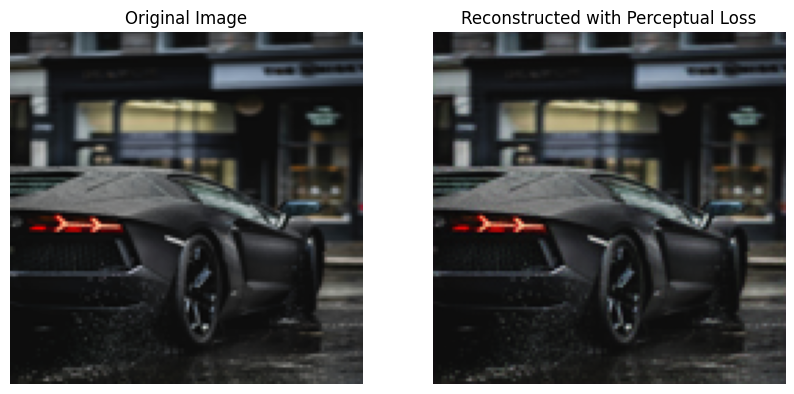

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

img_path = "/content/image.jpg"
image = Image.open(img_path).convert('RGB').resize((128, 128))

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(image).unsqueeze(0).to(device)

class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.conv(x)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = ConvBlock(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = ConvBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = ConvBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.bottleneck = ConvBlock(256, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = ConvBlock(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = ConvBlock(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = ConvBlock(128, 64)

        self.final = nn.Conv2d(64, 3, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool1(e1)

        e2 = self.enc2(p1)
        p2 = self.pool2(e2)

        e3 = self.enc3(p2)
        p3 = self.pool3(e3)

        b = self.bottleneck(p3)

        up3 = self.up3(b)
        cat3 = torch.cat([up3, e3], dim=1)
        d3 = self.dec3(cat3)

        up2 = self.up2(d3)
        cat2 = torch.cat([up2, e2], dim=1)
        d2 = self.dec2(cat2)

        up1 = self.up1(d2)
        cat1 = torch.cat([up1, e1], dim=1)
        d1 = self.dec1(cat1)

        out = torch.sigmoid(self.final(d1))
        return out

class PerceptualLoss(nn.Module):
    def __init__(self):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features[:16].to(device).eval()
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.criterion = nn.MSELoss()

    def forward(self, x, y):
        x_vgg = self.vgg(x)
        y_vgg = self.vgg(y)
        return self.criterion(x_vgg, y_vgg)

model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
mse_loss = nn.MSELoss()
perceptual_loss = PerceptualLoss()

epochs = 500
lambda_perceptual = 0.1

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(img_tensor)
    loss_mse = mse_loss(output, img_tensor)
    loss_perc = perceptual_loss(output, img_tensor)
    loss = loss_mse + lambda_perceptual * loss_perc
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item():.6f}")
model.eval()
with torch.no_grad():
    recon = model(img_tensor).cpu().squeeze(0).permute(1,2,0).numpy()

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(recon)
ax[1].set_title("Reconstructed with Perceptual Loss")
ax[1].axis("off")
plt.show()


Training model from scratch...
Epoch 50/500 Loss: 0.035580
Epoch 100/500 Loss: 0.004365
Epoch 150/500 Loss: 0.001187
Epoch 200/500 Loss: 0.000560
Epoch 250/500 Loss: 0.000348
Epoch 300/500 Loss: 0.000257
Epoch 350/500 Loss: 0.000190
Epoch 400/500 Loss: 0.000173
Epoch 450/500 Loss: 0.000277
Epoch 500/500 Loss: 0.000118
Model saved to autoencoder.pth
Original image size: 1237.13 KB
Compressed model size: 30146.77 KB


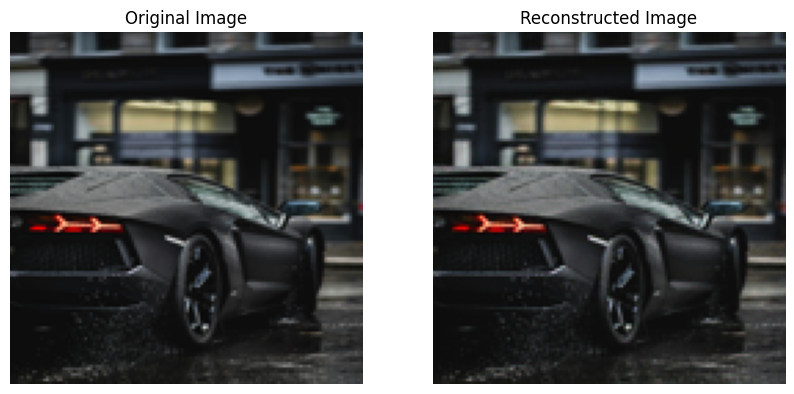

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

img_path = "/content/image.jpg"  # Replace with your image path
model_path = "autoencoder.pth"
recon_path = "reconstructed_cnn.jpg"

image = Image.open(img_path).convert('RGB').resize((128, 128))

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(image).unsqueeze(0).to(device)

class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.conv(x)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = ConvBlock(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = ConvBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = ConvBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.bottleneck = ConvBlock(256, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = ConvBlock(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = ConvBlock(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = ConvBlock(128, 64)

        self.final = nn.Conv2d(64, 3, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool1(e1)

        e2 = self.enc2(p1)
        p2 = self.pool2(e2)

        e3 = self.enc3(p2)
        p3 = self.pool3(e3)

        b = self.bottleneck(p3)

        up3 = self.up3(b)
        cat3 = torch.cat([up3, e3], dim=1)
        d3 = self.dec3(cat3)

        up2 = self.up2(d3)
        cat2 = torch.cat([up2, e2], dim=1)
        d2 = self.dec2(cat2)

        up1 = self.up1(d2)
        cat1 = torch.cat([up1, e1], dim=1)
        d1 = self.dec1(cat1)

        out = torch.sigmoid(self.final(d1))
        return out

class PerceptualLoss(nn.Module):
    def __init__(self):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features[:16].to(device).eval()
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.criterion = nn.MSELoss()

    def forward(self, x, y):
        x_vgg = self.vgg(x)
        y_vgg = self.vgg(y)
        return self.criterion(x_vgg, y_vgg)

model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
mse_loss = nn.MSELoss()
perceptual_loss = PerceptualLoss()

epochs = 500
lambda_perceptual = 0.1

if os.path.exists(model_path):
    print("Loading saved model weights...")
    model.load_state_dict(torch.load(model_path))
else:
    print("Training model from scratch...")
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(img_tensor)
        loss_mse = mse_loss(output, img_tensor)
        loss_perc = perceptual_loss(output, img_tensor)
        loss = loss_mse + lambda_perceptual * loss_perc
        loss.backward()
        optimizer.step()

        if (epoch+1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item():.6f}")

    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

model.eval()
with torch.no_grad():
    recon = model(img_tensor).cpu().squeeze(0).permute(1,2,0).numpy()

recon_img = Image.fromarray((recon * 255).astype(np.uint8))
recon_img.save(recon_path)
size_original = os.path.getsize(img_path) / 1024
size_model = os.path.getsize(model_path) / 1024

print(f"Original image size: {size_original:.2f} KB")
print(f"Compressed model size: {size_model:.2f} KB")

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(recon)
ax[1].set_title("Reconstructed Image")
ax[1].axis("off")
plt.show()


Epoch 50/300, Loss: 0.009778
Epoch 100/300, Loss: 0.004891
Epoch 150/300, Loss: 0.003312
Epoch 200/300, Loss: 0.002351
Epoch 250/300, Loss: 0.001797
Epoch 300/300, Loss: 0.001450


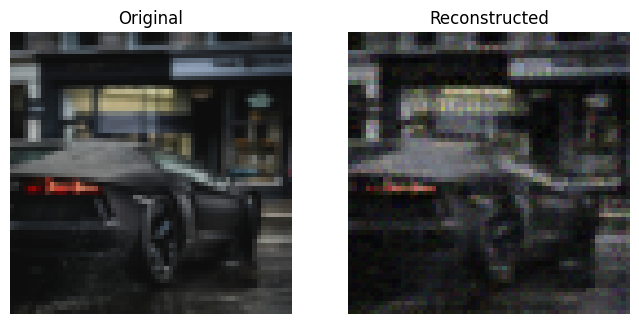

Original image size: 1237.13 KB
Quantized latent vector size: 0.57 KB
Quantized model size: 274.91 KB
Total compressed size (latent + model): 275.48 KB


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import io

image_path = "image.jpg"
img_size = 64
latent_dim = 16

img = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])
img_tensor = transform(img).unsqueeze(0)

class SmallAutoencoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Flatten(),
            nn.Linear(32*16*16, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32*16*16),
            nn.ReLU(True),
            nn.Unflatten(1, (32,16,16)),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAutoencoder(latent_dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 300

img_tensor = img_tensor.to(device)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(img_tensor)
    loss = criterion(output, img_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")
model.eval()
with torch.no_grad():
    reconstructed = model(img_tensor).cpu().squeeze(0).permute(1,2,0).numpy()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_tensor.cpu().squeeze(0).permute(1,2,0).numpy())
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstructed")
plt.imshow(reconstructed)
plt.axis("off")
plt.show()

latent_vector = model.encoder(img_tensor).detach().cpu().squeeze(0).numpy()
latent_min, latent_max = latent_vector.min(), latent_vector.max()
latent_scaled = ((latent_vector - latent_min) / (latent_max - latent_min) * 254 - 127).astype(np.int8)
np.savez_compressed("latent_compressed.npz", latent=latent_scaled, min=latent_min, max=latent_max)
def quantize_tensor(tensor):
    t_min, t_max = tensor.min(), tensor.max()
    scale = (t_max - t_min) / 254
    quantized = ((tensor - t_min) / scale - 127).round().clamp(-128,127).to(torch.int8)
    return quantized, t_min, scale

quantized_params = {}
for name, param in model.state_dict().items():
    q_param, p_min, p_scale = quantize_tensor(param.cpu())
    quantized_params[name] = (q_param.numpy(), float(p_min), float(p_scale))

import pickle
with open("quantized_model.pkl", "wb") as f:
    pickle.dump(quantized_params, f)
orig_size_kb = os.path.getsize(image_path) / 1024
latent_size_kb = os.path.getsize("latent_compressed.npz") / 1024
model_size_kb = os.path.getsize("quantized_model.pkl") / 1024

print(f"Original image size: {orig_size_kb:.2f} KB")
print(f"Quantized latent vector size: {latent_size_kb:.2f} KB")
print(f"Quantized model size: {model_size_kb:.2f} KB")
print(f"Total compressed size (latent + model): {latent_size_kb + model_size_kb:.2f} KB")


Epoch [1/300] Loss: 0.104165
Epoch [50/300] Loss: 0.003503
Epoch [100/300] Loss: 0.000248
Epoch [150/300] Loss: 0.000072
Epoch [200/300] Loss: 0.000039
Epoch [250/300] Loss: 0.000022
Epoch [300/300] Loss: 0.000207
Latent vector saved: 0.12 KB
Model weights saved: 29765.17 KB
Reconstructed image saved as reconstructed.png


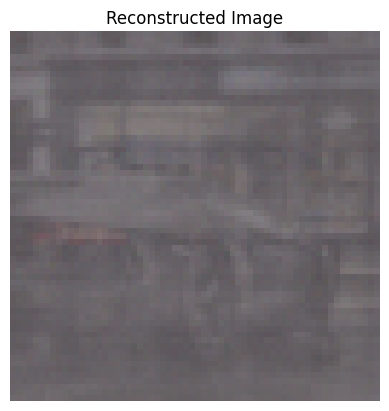

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import numpy as np
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_dim = 128
epochs = 300
learning_rate = 1e-3
image_size = 64

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Flatten(),
            nn.Linear(512*4*4, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512*4*4),
            nn.ReLU(True),
            nn.Unflatten(1, (512,4,4)),
            nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out
def load_image(path):
    img = Image.open(path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img_tensor
def train(model, img_tensor):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(img_tensor)
        loss = criterion(output, img_tensor)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.6f}")
def save_compressed(model, img_tensor, filename_prefix="compressed"):
    model.eval()
    with torch.no_grad():
        latent_vector = model.encoder(img_tensor).cpu().squeeze(0)
    latent_min = latent_vector.min()
    latent_max = latent_vector.max()
    latent_norm = (latent_vector - latent_min) / (latent_max - latent_min + 1e-8)
    latent_int8 = (latent_norm * 255).to(torch.uint8).numpy()
    np.save(f"{filename_prefix}_latent.npy", latent_int8)
    print(f"Latent vector saved: {latent_int8.nbytes / 1024:.2f} KB")
    torch.save(model.state_dict(), f"{filename_prefix}_model.pth")
    model_size_kb = os.path.getsize(f"{filename_prefix}_model.pth") / 1024
    print(f"Model weights saved: {model_size_kb:.2f} KB")
def reconstruct_image(model, latent_vector_path, filename_prefix="reconstructed"):
    model.eval()
    latent_int8 = np.load(latent_vector_path)
    latent_norm = latent_int8.astype(np.float32) / 255

    latent_vector = torch.tensor(latent_norm).to(device)

    with torch.no_grad():
        reconstructed = model.decoder(latent_vector.unsqueeze(0)).cpu().squeeze(0)
    img_np = reconstructed.permute(1, 2, 0).numpy()
    img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
    img = Image.fromarray(img_np)
    img.save(f"{filename_prefix}.png")
    print(f"Reconstructed image saved as {filename_prefix}.png")

if __name__ == "__main__":
    img_path = "image.jpg"
    img_tensor = load_image(img_path)

    model = Autoencoder().to(device)
    train(model, img_tensor)
    save_compressed(model, img_tensor)

    reconstruct_image(model, "compressed_latent.npy")

    import matplotlib.pyplot as plt
recon_img = Image.open("reconstructed.png")
plt.imshow(recon_img)
plt.axis('off')
plt.title("Reconstructed Image")
plt.show()



In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])


train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

print("Data loaders ready! Number of training samples:", len(train_dataset))


100%|██████████| 170M/170M [00:03<00:00, 47.4MB/s]


Data loaders ready! Number of training samples: 50000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32*8*8, 128)
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 32*8*8),
            nn.Unflatten(1, (32, 8, 8)),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for imgs, _ in train_loader:
        imgs = imgs.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, imgs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.6f}")

print("Training complete!")


Epoch [1/20] Loss: 1.941854
Epoch [2/20] Loss: 1.656922
Epoch [3/20] Loss: 1.610754
Epoch [4/20] Loss: 1.590097
Epoch [5/20] Loss: 1.579007
Epoch [6/20] Loss: 1.574368
Epoch [7/20] Loss: 1.570141
Epoch [8/20] Loss: 1.566867
Epoch [9/20] Loss: 1.564742
Epoch [10/20] Loss: 1.565436
Epoch [11/20] Loss: 1.562630
Epoch [12/20] Loss: 1.561906
Epoch [13/20] Loss: 1.562574
Epoch [14/20] Loss: 1.561815
Epoch [15/20] Loss: 1.560805
Epoch [16/20] Loss: 1.560075
Epoch [17/20] Loss: 1.559148
Epoch [18/20] Loss: 1.558031
Epoch [19/20] Loss: 1.558076
Epoch [20/20] Loss: 1.559275
Training complete!


Average PSNR: 14.8406
Average SSIM: 0.4156


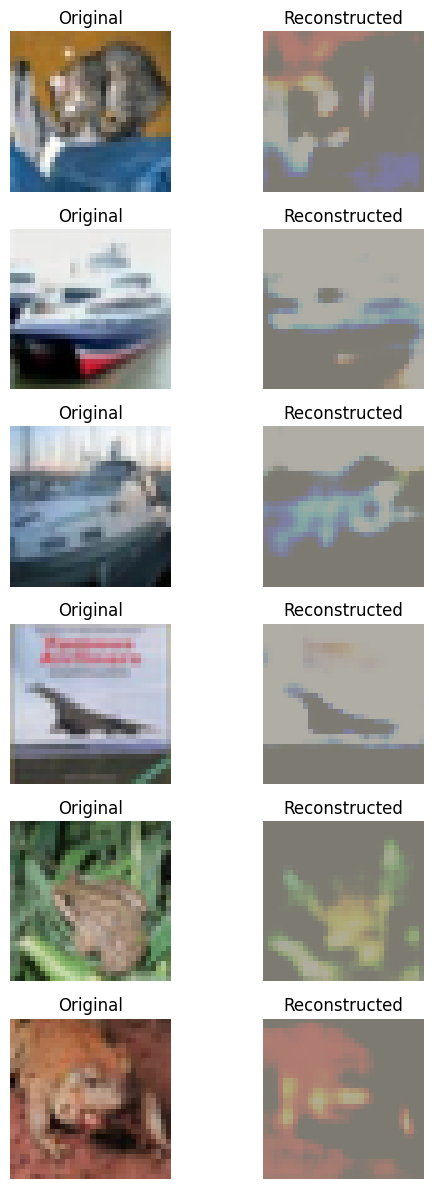

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
model.eval()

imgs, _ = next(iter(test_loader))
imgs = imgs.to(device)

with torch.no_grad():
    outputs = model(imgs)
imgs_np = imgs.cpu().numpy()
outputs_np = outputs.cpu().numpy()

mean = np.array([0.4914, 0.4822, 0.4465]).reshape(3, 1, 1)
std = np.array([0.2023, 0.1994, 0.2010]).reshape(3, 1, 1)

imgs_np = imgs_np * std + mean
outputs_np = outputs_np * std + mean

psnr_list = []
ssim_list = []
for i in range(len(imgs_np)):
    orig = np.transpose(imgs_np[i], (1, 2, 0))
    recon = np.transpose(outputs_np[i], (1, 2, 0))
    psnr_list.append(psnr(orig, recon, data_range=1))
    ssim_list.append(ssim(orig, recon, channel_axis=2, data_range=1))

print(f"Average PSNR: {np.mean(psnr_list):.4f}")
print(f"Average SSIM: {np.mean(ssim_list):.4f}")
n = 6
fig, axes = plt.subplots(n, 2, figsize=(6, 2*n))
for i in range(n):
    axes[i, 0].imshow(np.transpose(imgs_np[i], (1, 2, 0)))
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(np.transpose(outputs_np[i], (1, 2, 0)))
    axes[i, 1].set_title("Reconstructed")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


Epoch [1/20] Loss: 0.005734
Epoch [2/20] Loss: 0.000594
Epoch [3/20] Loss: 0.000381
Epoch [4/20] Loss: 0.000282
Epoch [5/20] Loss: 0.000228
Epoch [6/20] Loss: 0.000186
Epoch [7/20] Loss: 0.000160
Epoch [8/20] Loss: 0.000140
Epoch [9/20] Loss: 0.000121
Epoch [10/20] Loss: 0.000109
Epoch [11/20] Loss: 0.000098
Epoch [12/20] Loss: 0.000093
Epoch [13/20] Loss: 0.000079
Epoch [14/20] Loss: 0.000077
Epoch [15/20] Loss: 0.000072
Epoch [16/20] Loss: 0.000069
Epoch [17/20] Loss: 0.000057
Epoch [18/20] Loss: 0.000055
Epoch [19/20] Loss: 0.000053
Epoch [20/20] Loss: 0.000049


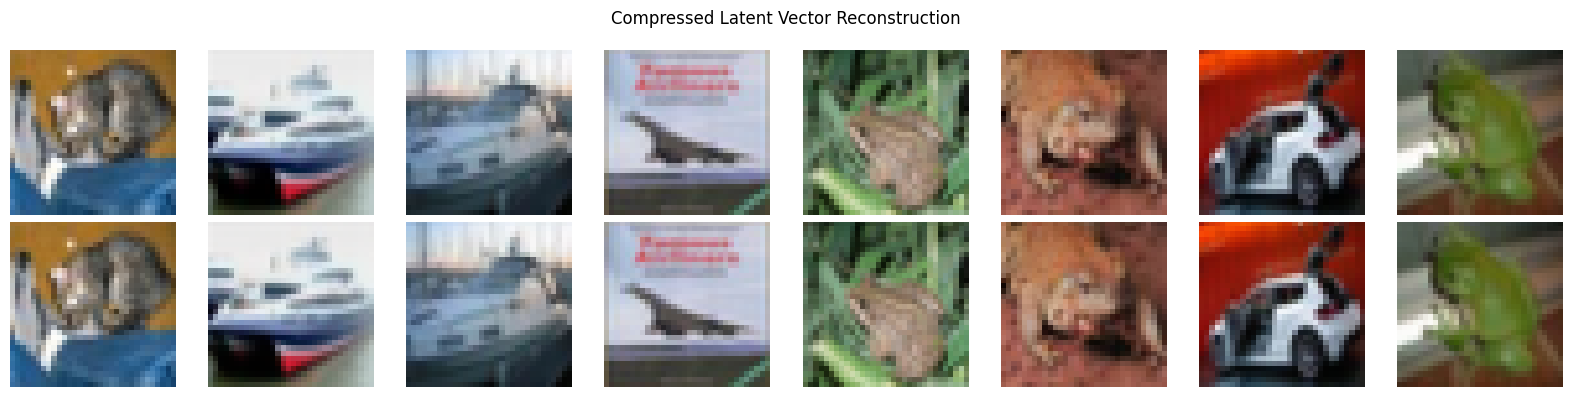

Original latent vector size: 1024.00 KB
Compressed latent vector size: 80.52 KB


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import zlib

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)
class SkipAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.enc1 = nn.Sequential(nn.Conv2d(3, 64, 3, padding=1), nn.ReLU())
        self.enc2 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=2, padding=1), nn.ReLU())
        self.enc3 = nn.Sequential(nn.Conv2d(128, 256, 3, stride=2, padding=1), nn.ReLU())

        self.dec1 = nn.Sequential(nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), nn.ReLU())
        self.dec2 = nn.Sequential(nn.ConvTranspose2d(256, 64, 3, stride=2, padding=1, output_padding=1), nn.ReLU())
        self.final = nn.Sequential(nn.Conv2d(128, 3, 3, padding=1), nn.Tanh())  # Output normalized [-1, 1]

    def encoder(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        return e1, e2, e3

    def decoder(self, latent_tuple):
        e1, e2, e3 = latent_tuple
        d1 = self.dec1(e3)
        d1_cat = torch.cat([d1, e2], dim=1)
        d2 = self.dec2(d1_cat)
        d2_cat = torch.cat([d2, e1], dim=1)
        out = self.final(d2_cat)
        return out

    def forward(self, x):
        e1, e2, e3 = self.encoder(x)
        out = self.decoder((e1, e2, e3))
        return out
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SkipAutoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    for imgs, _ in train_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)

    avg_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {avg_loss:.6f}")
model.eval()
imgs, _ = next(iter(test_loader))
imgs = imgs.to(device)

with torch.no_grad():
    e1, e2, e3 = model.encoder(imgs)
    latent = e3.cpu().numpy()

    latent_min = latent.min()
    latent_max = latent.max()
    latent_norm = (latent - latent_min) / (latent_max - latent_min + 1e-8)
    latent_uint8 = (latent_norm * 255).astype(np.uint8)

    compressed = zlib.compress(latent_uint8.tobytes(), level=9)

    decompressed_bytes = zlib.decompress(compressed)
    latent_decompressed_uint8 = np.frombuffer(decompressed_bytes, dtype=np.uint8).reshape(latent.shape)
    latent_decompressed_norm = latent_decompressed_uint8.astype(np.float32) / 255.0
    latent_decompressed = latent_decompressed_norm * (latent_max - latent_min) + latent_min

    latent_tensor = torch.tensor(latent_decompressed).to(device)

    recons = model.decoder((e1, e2, latent_tensor))
def denorm(img):
    return (img * 0.5 + 0.5).clamp(0, 1)

imgs = denorm(imgs.cpu())
recons = denorm(recons.cpu())
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
for i in range(8):
    axes[0, i].imshow(imgs[i].permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[1, i].imshow(recons[i].permute(1, 2, 0))
    axes[1, i].axis('off')
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Reconstructed')
plt.suptitle('Compressed Latent Vector Reconstruction')
plt.tight_layout()
plt.show()

print(f"Original latent vector size: {latent.nbytes / 1024:.2f} KB")
print(f"Compressed latent vector size: {len(compressed) / 1024:.2f} KB")



Saved images & size comparison (in KB):
Image 0 ➤ Original: 2.43 KB | Reconstructed: 2.43 KB
Image 1 ➤ Original: 2.10 KB | Reconstructed: 2.17 KB
Image 2 ➤ Original: 2.22 KB | Reconstructed: 2.23 KB
Image 3 ➤ Original: 2.10 KB | Reconstructed: 2.10 KB
Image 4 ➤ Original: 2.52 KB | Reconstructed: 2.53 KB
Image 5 ➤ Original: 2.35 KB | Reconstructed: 2.35 KB
Image 6 ➤ Original: 2.42 KB | Reconstructed: 2.42 KB
Image 7 ➤ Original: 2.13 KB | Reconstructed: 2.13 KB


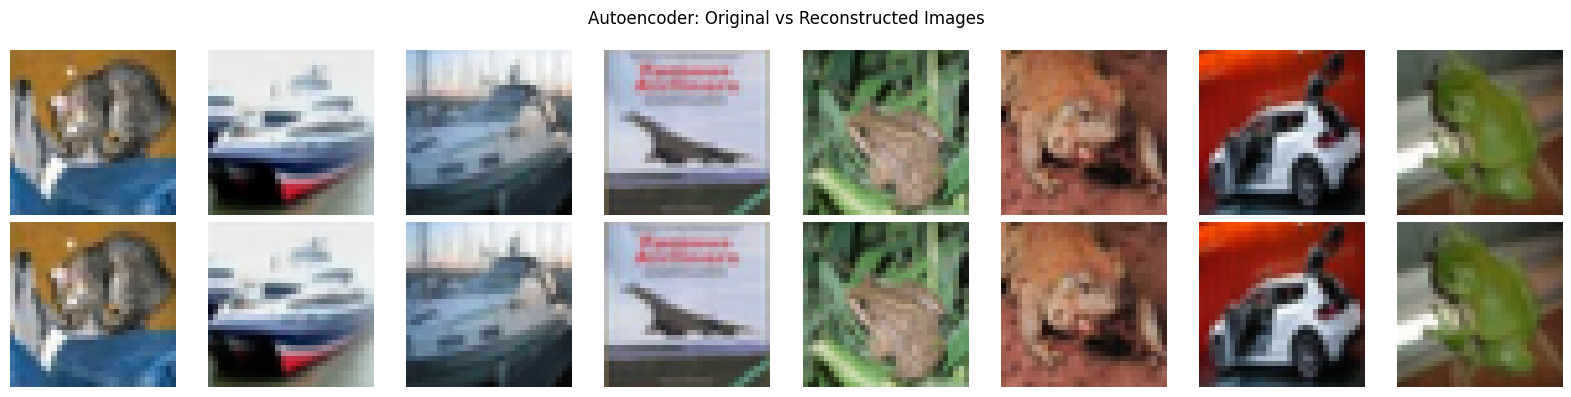

In [ ]:
import torch
import os
from torchvision.utils import save_image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def denorm(img):
    return (img * 0.5 + 0.5).clamp(0, 1)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
test_loader  = DataLoader(test_dataset, batch_size=8, shuffle=False)

imgs, _ = next(iter(test_loader))
imgs = imgs.to("cuda" if torch.cuda.is_available() else "cpu")

model.eval()
with torch.no_grad():
    recons = model(imgs)

os.makedirs("output_images", exist_ok=True)

print("\nSaved images & size comparison (in KB):")
for i in range(len(imgs)):
    orig_path = f"output_images/orig_{i}.png"
    recon_path = f"output_images/recon_{i}.png"

    save_image(denorm(imgs[i]), orig_path)
    save_image(denorm(recons[i]), recon_path)

    orig_size = os.path.getsize(orig_path) / 1024
    recon_size = os.path.getsize(recon_path) / 1024
    print(f"Image {i} ➤ Original: {orig_size:.2f} KB | Reconstructed: {recon_size:.2f} KB")

import matplotlib.pyplot as plt

imgs = denorm(imgs.cpu())
recons = denorm(recons.cpu())

fig, axes = plt.subplots(2, 8, figsize=(16, 4))
for i in range(8):
    axes[0, i].imshow(imgs[i].permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[1, i].imshow(recons[i].permute(1, 2, 0))
    axes[1, i].axis('off')
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Reconstructed')
plt.suptitle('Autoencoder: Original vs Reconstructed Images')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

img = imgs[0].unsqueeze(0).to(device)


with torch.no_grad():
    latent = model.enc3(model.enc2(model.enc1(img)))


orig_path = "output_images/one_original.png"
save_image(denorm(img[0].cpu()), orig_path)


latent_np = latent.cpu().numpy()
latent_compressed = (latent_np * 127).astype(np.int8)
np.savez_compressed("output_images/latent_compressed.npz", latent_compressed)

orig_size = os.path.getsize(orig_path) / 1024
latent_size = os.path.getsize("output_images/latent_compressed.npz") / 1024

print(f"\n[Compression Check]")
print(f"Original image size      : {orig_size:.2f} KB")
print(f"Compressed latent size   : {latent_size:.2f} KB")



[Compression Check]
Original image size      : 2.04 KB
Compressed latent size   : 5.73 KB
